# Demonstration

This notebook guides you on how to reproduce figure 5 of the paper

Section ```Local scheduler - Offline mode``` from README file must have been previously followed

In [17]:
import pandas as pd
import os.path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
dataset = pd.read_csv('debug/monitoring.csv', sep='\t')

keys_as_float = ['tmp', 'val', 'config', 'sb_oc', 'sb_unused']
for key in keys_as_float: dataset[key] = dataset[key].apply(lambda x : None if x == 'None' else float(x))
dataset['time'] = dataset['tmp'] / 60

/tmp/ipykernel_54278/1404122898.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('debug/monitoring.csv', sep='\t')


In [19]:
subsets = dataset.loc[dataset['rec'] == 'subset']
subsets_cpu = subsets.loc[subsets['res'] == 'cpu']
subsets_mem = subsets.loc[subsets['res'] == 'mem']

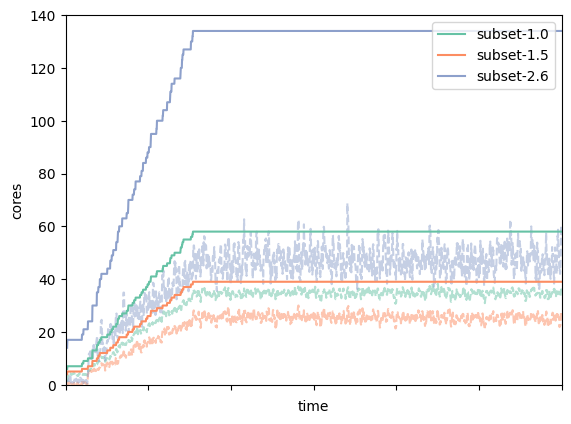

In [20]:
palette = sns.color_palette("Set2", subsets_cpu['subset'].nunique())

g_val = sns.lineplot(data=subsets_cpu, x='tmp', y='val', hue='subset', palette=palette, linestyle='--', legend=False, alpha=0.5)
g_config = sns.lineplot(data=subsets_cpu, x='tmp', y='config', hue='subset', palette=palette)
g_config.legend(loc='upper right', title=None)

plt.xlim([0, 30000])
plt.ylim([0, 140])
g_config.set_ylabel('cores')
g_config.set_xlabel('time')
res = g_config.set_xticklabels([])